# Solving Differential Equations with the Euler-Cromer Method

You will encounter differential equations that cannot be solved analytically. However, there are numerical methods that can be used to solve them with a computer. For many second-order, ordinary differential equations, a fairly simple approach called the Euler-Cromer Method is sufficient. This method was used frequently in Physics 231, but the name may not have been mentioned. (Note that it is referred to as the "last point approximation" or LPA in the refrence below.)

## Notation

We will use shorthand notation for time derivatives where  

$$
\dot{x} = \frac{dx}{dt} 
$$
and 

$$
\ddot{x} = \frac{d^2x}{dt^2}.
$$    

In other words, the number of dots indicates the number of time derivatives.   
We’ll be finding the value of $x(t)$ at discrete values of
$t$. Label these times with integer subscripts as   

$$
t_1 = t_0 + \Delta t \\
t_2 = t_0 + 2\Delta t \\
\vdots \\
t_i = t_0 + i\;\Delta t
$$  

where $t_0$ is the initial time and $\Delta t$ is the time interval between the subsequent solutions. We will also label the values of the function at these time with integers as  

$$
x_0 = x(t_0) \\
x_1 = x(t_1) \\
\vdots \\
x_i = x(t_i).
$$  

Similarly, the derivatives at step $i$ are  

$$
\dot{x}_i = \dot{x}(t_i)
$$  

and  

$$\ddot{x}_i = \ddot{x}(t_i).$$

## The Problem

The form of the second-order differential equation to be solved is  

$$
\frac{d^2x}{dt^2} = f\left(x, \frac{dx}{dt}, t\right),
$$  

or, in the more compact notation, it is  

$$
\ddot{x} = f\left(x, \dot{x}, t\right).
$$  

With the initial values of the variable ($x_0$) and its first derivative ($\dot{x}_0$) are known at the initial time ($t_0$), we want to find $x$ and $\dot{x}$ at later times.

## Euler Method

The simplest numerical method to solve differential equations is the Euler Method. The derivatives at step $i$ can be approximated as  

$$
\dot{x}_i = \frac{dx}{dt}\bigg|_{t_i} \approx \frac{x(t_{i+1}) - x(t_{i})}{\Delta t} = \frac{x_{i+1} - x_i}{\Delta t}
$$  

and  

$$
\ddot{x}_i = \frac{d^2x}{dt^2}\bigg|_{t_i} \approx \frac{\dot{x}(t_{i+1}) - \dot{x}(t_{i})}{\Delta t} = \frac{\dot{x}_{i+1} - \dot{x}_i}{\Delta t} .
$$  

Suppose that $x$ and $\dot{x}$ are known at some time. Rearranging the equation for the first derivative, the approximate the solution after moving a step forward in time is  

$$
x_{i+1} \approx x_i + \dot{x}_i\Delta t.
$$  

To find the solution at another step forward in time, we will need to know the first derivative at that later time. Rearranging the equation for the second derivative, the approximate first derivative after moving a step forward in time is  

$$
\dot{x}_{i+1} \approx \dot{x}_i + \ddot{x}_i\Delta t 
= \dot{x}_i + f(x_i,\dot{x}_i,t_i)\Delta t,
$$  

where we insert the function for the second derivative. These final two equations can be used iteratively to find the approximate solution at later times. Unfortunately, this method is not very accurate after a while. (For classical mechanics problems, this method often doesn't conserve energy.)

## Euler-Cromer Method

A simple modification to the method described above greatly improves the accuracy of the numerical solution. First, calculate the value of the second derivative at the current time,  

$$
\ddot{x}_i = f(x_i,\dot{x}_i,t_i),
$$  

and use it to approximate first derivative after a step forward in time,  

$$
\dot{x}_{i+1} \approx \dot{x}_i + \ddot{x}_i\Delta t.
$$  

Next, the value of the varible at a later time is approximated by  

$$
x_{i+1} \approx x_i + \dot{x}_{i+1}\Delta t,
$$  

where the first derivative at the later time is used.  
Note the slight difference between this approach and the Euler Method. The current value of $\ddot{x}$ (which may depend on the current values of $x$, $\dot{x}$, and $t$) is used to calculate a new value of $\dot{x}$. However, the new value of $\dot{x}$ is used to calculate the new value of $x$.

## Implementation in Python

As an example, we can numerically solve the differential equation  

$$
\frac{d^2x}{dt^2} = -kx,
$$  

for $k=5$ and with initial conditions $x=10$ and $\dot{x}=0$ at $t=0$. In the program, the first and second derivatives of $x$
will be called $xd$ and $xdd$, respectively. (Thinks of each "$d$" as a dot in the shorthand notation for derivatives.) The first part of the program prepares for the calculation. The pylab library is imported so that the results can be plotted. Constant(s), initial values of $x$, $xd$, and $xdd$, time step $dt$, and the final time $tf$ are set. Three lists ($t\_list$, $x\_list$, and $xd\_list$) are started with the inital values of $t$, $x$, and $xd$.

In [1]:
import pylab as pl

# constants
k = 5

# set inital values, time step, & final time
t = 0
x = 10
xd = 0
dt = 0.001
tf = 10

# start lists with the initial values
t_list = [t] 
x_list = [x]
xd_list = [xd]

The main part of the program is the loop that calculates $x$ and its first derivative ($xd$) at time steps of $dt$ using the Euler-Cromer method. The results for each step are appended to the lists. For this example, the calculation continues until the time reaches $tf$.

In [2]:
while (t < tf):
    # calculate new values
    xdd = -k*x       # Calculate d2x/dt2 using the current x & dx/dt
    xd = xd + xdd*dt # Use d2x/dt2 to update dx/dt
    x = x + xd*dt   # Use the updated dx/dt to update x
    t = t + dt      # Advance t by a step dt
    # append new values to lists
    t_list.append(t)
    x_list.append(x)
    xd_list.append(xd)

The results were stored in lists so that they can be used. After the calculations are complete, $x$ and $\dot{x}=dx/dt$ can plotted versus $t$ as shown below.

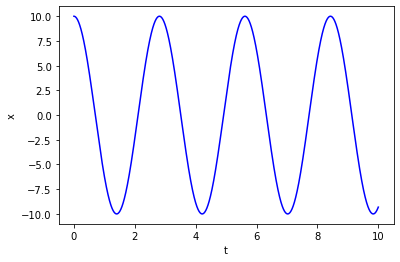

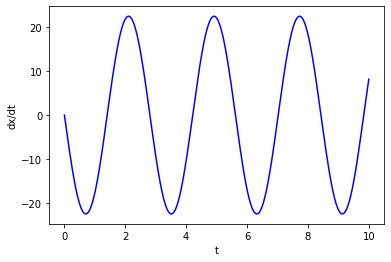

In [3]:
# plot the x and dx/dt vs. time (from the lists)
pl.figure()
pl.plot(t_list,x_list, ls='-', c='b')
pl.xlabel('t')
pl.ylabel('x')

pl.figure()
pl.plot(t_list,xd_list, ls='-', c='b')
pl.xlabel('t')
pl.ylabel('dx/dt')

pl.show()

It is important to check that the time step used was small enough to get accurate results. If $dt$ is small enough, changing it slightly won't change the results significantly.

Note that this method can be used for ordinary, second-order differential equations, even if the function depends of something other than time. For example, it could be used to solve  

$$
\frac{d^2z}{dx^2} = 3z - \frac{dz}{dx}
$$  

for $z(x)$.

## Reference

[Alan Cromer, "Stable solutions using the Euler approximation," *Am. J. Phys.* **49**, 455-459 (1981).]( http://scitation.aip.org/content/aapt/journal/ajp/49/5/10.1119/1.12478)  
(Note: As mentioned in the article, this method was discovered accidentally by a high school student.)